# DATA MINING PROJECT

Question: Earthquake safety precautions based on historic data?

In [1]:
#importing the required libraries
import pandas as pd #for managing the dataframe and load dataset
import numpy as np #for managing the data
import matplotlib.pyplot as plt #for data visualization and graphical plotting
from sklearn.cluster import KMeans #for applying kmeans clustering
import geopandas as gpd  # conda install geopandas

In [3]:
data = pd.read_csv("C:\\Users\\balak\\OneDrive\\Desktop\\Applied Data Science\\Earthquake Prediction\\Indian_earthquake_data.xls") #Loading dataset using pandas
print(data) #printing the dataset

                  Origin Time  Latitude  Longitude  Depth  Magnitude  \
0     2021-07-31 09:43:23 IST     29.06      77.42    5.0        2.5   
1     2021-07-30 23:04:57 IST     19.93      72.92    5.0        2.4   
2     2021-07-30 21:31:10 IST     31.50      74.37   33.0        3.4   
3     2021-07-30 13:56:31 IST     28.34      76.23    5.0        3.1   
4     2021-07-30 07:19:38 IST     27.09      89.97   10.0        2.1   
...                       ...       ...        ...    ...        ...   
2714  2019-08-04 06:56:19 IST     12.30      94.80   10.0        4.8   
2715  2019-08-04 05:40:33 IST     24.70      94.30   40.0        4.1   
2716  2019-08-03 16:29:37 IST     22.50      88.10   10.0        3.6   
2717  2019-08-03 01:59:11 IST     24.60      94.20   54.0        3.5   
2718  2019-08-01 06:13:21 IST     14.50      92.90   10.0        4.6   

                                               Location  
0                          53km NNE of New Delhi, India  
1                  

In [4]:
print("The shape of the dataframe is: ",data.shape) #printing the shape to know the size
data.info() #tells about the information of data frame

The shape of the dataframe is:  (2719, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Origin Time  2719 non-null   object 
 1   Latitude     2719 non-null   float64
 2   Longitude    2719 non-null   float64
 3   Depth        2719 non-null   float64
 4   Magnitude    2719 non-null   float64
 5   Location     2719 non-null   object 
dtypes: float64(4), object(2)
memory usage: 127.6+ KB


In [ ]:
print("The column names of the dataframe are: ",data.columns) #prints the columns headings
data.describe() #Tells some statical measures

The column names of the dataframe are:  Index(['Origin Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Location'],
      dtype='object')


,Latitude,Longitude,Depth,Magnitude
count,2719.000000,2719.000000,2719.000000,2719.000000
mean,29.939433,80.905638,53.400478,3.772196
std,7.361564,10.139075,68.239737,0.768076
min,0.120000,60.300000,0.800000,1.500000
25%,25.700000,71.810000,10.000000,3.200000
50%,31.210000,76.610000,15.000000,3.900000
75%,36.390000,92.515000,82.000000,4.300000
max,40.000000,99.960000,471.000000,7.000000


In [ ]:
data['Origin Time'] = pd.to_datetime(data['Origin Time'])  #noting the location
data['Place'] = data.apply(lambda x: x['Location'].split(',')[-1], axis=1) #adding it as new cloumn
data.head()

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location,Place
0,2021-07-31 09:43:23,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",India
1,2021-07-30 23:04:57,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",India
2,2021-07-30 21:31:10,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",India
3,2021-07-30 13:56:31,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana",Haryana
4,2021-07-30 07:19:38,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan",Bhutan


### Data cleaning

The data cleaning is a method of detecting and removing errors and inconsistency form data inorder to improve
quality of data.

In [ ]:
#Ignore the tuple
### here we can't do fill by most probable value, or fill by mean or anything as we can't replace the null  with them
data.dropna(inplace=True)
print(data)

             Origin Time  Latitude  Longitude  Depth  Magnitude  \
0    2021-07-31 09:43:23     29.06      77.42    5.0        2.5   
1    2021-07-30 23:04:57     19.93      72.92    5.0        2.4   
2    2021-07-30 21:31:10     31.50      74.37   33.0        3.4   
3    2021-07-30 13:56:31     28.34      76.23    5.0        3.1   
4    2021-07-30 07:19:38     27.09      89.97   10.0        2.1   
...                  ...       ...        ...    ...        ...   
2714 2019-08-04 06:56:19     12.30      94.80   10.0        4.8   
2715 2019-08-04 05:40:33     24.70      94.30   40.0        4.1   
2716 2019-08-03 16:29:37     22.50      88.10   10.0        3.6   
2717 2019-08-03 01:59:11     24.60      94.20   54.0        3.5   
2718 2019-08-01 06:13:21     14.50      92.90   10.0        4.6   

                                               Location     Place  
0                          53km NNE of New Delhi, India     India  
1                  91km W of Nashik, Maharashtra, India    

### Data Integration

Data mining involves data integration, where multiple data sources are merged together and also checks for
redundancy.

In [ ]:
data.corr()  #printing the coreleation matrix

,Latitude,Longitude,Depth,Magnitude
Latitude,1.000000,-0.604389,0.307276,0.145171
Longitude,-0.604389,1.000000,-0.246407,-0.085008
Depth,0.307276,-0.246407,1.000000,0.336975
Magnitude,0.145171,-0.085008,0.336975,1.000000


In [ ]:
### Here we can say that the values are not dependent to each other from correlation matrix

### Data selection

Helps to select over required data.

In [ ]:
# selecting some required data
data = data.drop(['Origin Time','Location','Place'], axis=1)
print(data)

      Latitude  Longitude  Depth  Magnitude
0        29.06      77.42    5.0        2.5
1        19.93      72.92    5.0        2.4
2        31.50      74.37   33.0        3.4
3        28.34      76.23    5.0        3.1
4        27.09      89.97   10.0        2.1
...        ...        ...    ...        ...
2714     12.30      94.80   10.0        4.8
2715     24.70      94.30   40.0        4.1
2716     22.50      88.10   10.0        3.6
2717     24.60      94.20   54.0        3.5
2718     14.50      92.90   10.0        4.6

[2719 rows x 4 columns]


In [ ]:
df_geo=gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data.Longitude,data.Latitude))

In [ ]:
df_geo

,Latitude,Longitude,Depth,Magnitude,geometry
0,29.06,77.42,5.0,2.5,POINT (77.42000 29.06000)
1,19.93,72.92,5.0,2.4,POINT (72.92000 19.93000)
2,31.50,74.37,33.0,3.4,POINT (74.37000 31.50000)
3,28.34,76.23,5.0,3.1,POINT (76.23000 28.34000)
4,27.09,89.97,10.0,2.1,POINT (89.97000 27.09000)
...,...,...,...,...,...
2714,12.30,94.80,10.0,4.8,POINT (94.80000 12.30000)
2715,24.70,94.30,40.0,4.1,POINT (94.30000 24.70000)
2716,22.50,88.10,10.0,3.6,POINT (88.10000 22.50000)
2717,24.60,94.20,54.0,3.5,POINT (94.20000 24.60000)


In [ ]:
world_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

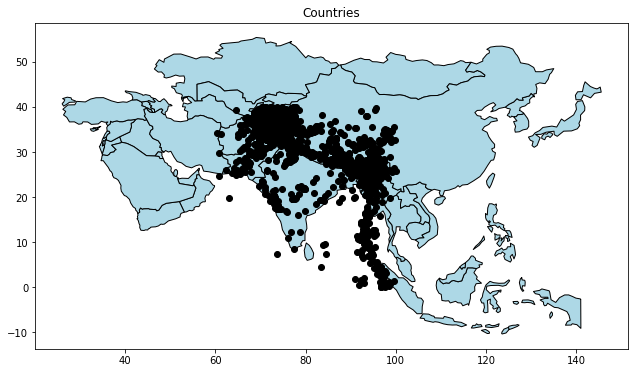

In [ ]:
axis=world_data[world_data.continent=='Asia'].plot(color='lightblue',edgecolor='black')
df_geo.plot(ax=axis,color='black')
plt.title('Countries')
plt.rcParams["figure.figsize"] = (30,6)

### Data transformation

The data needs to transform into unique appropriate format.

In [ ]:
X = data.iloc[:, [0,1,2,3]].values
print(X)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) #applying the kmeans cluster of 5
y_kmeans1 = kmeans.fit_predict(X) #fitting the data for prediction

[[29.06 77.42  5.    2.5 ]
 [19.93 72.92  5.    2.4 ]
 [31.5  74.37 33.    3.4 ]
 ...
 [22.5  88.1  10.    3.6 ]
 [24.6  94.2  54.    3.5 ]
 [14.5  92.9  10.    4.6 ]]


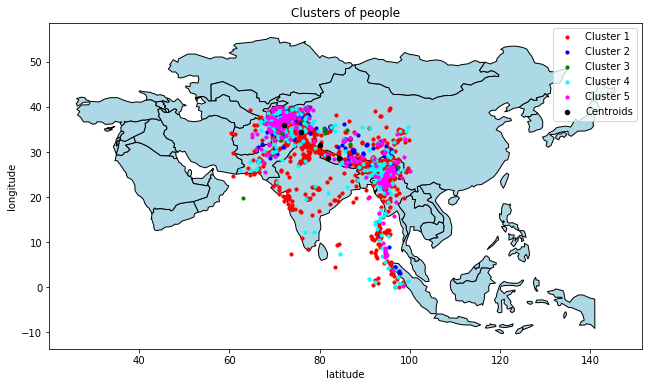

In [ ]:
axis=world_data[world_data.continent=='Asia'].plot(color='lightblue',edgecolor='black')
plt.plot(ax=axis)
plt.scatter(X[y_kmeans1 == 0, 1], X[y_kmeans1 == 0, 0], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans1 == 1, 1], X[y_kmeans1 == 1, 0], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans1 == 2, 1], X[y_kmeans1 == 2, 0], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans1 == 3, 1], X[y_kmeans1 == 3, 0], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans1 == 4, 1], X[y_kmeans1 == 4, 0], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 20, c = 'black', label = 'Centroids')

plt.title('Clusters of people')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()
plt.show()

In [ ]:
data['cluster']=y_kmeans1
print(data)

      Latitude  Longitude  Depth  Magnitude                   geometry  \
0        29.06      77.42    5.0        2.5  POINT (77.42000 29.06000)   
1        19.93      72.92    5.0        2.4  POINT (72.92000 19.93000)   
2        31.50      74.37   33.0        3.4  POINT (74.37000 31.50000)   
3        28.34      76.23    5.0        3.1  POINT (76.23000 28.34000)   
4        27.09      89.97   10.0        2.1  POINT (89.97000 27.09000)   
...        ...        ...    ...        ...                        ...   
2714     12.30      94.80   10.0        4.8  POINT (94.80000 12.30000)   
2715     24.70      94.30   40.0        4.1  POINT (94.30000 24.70000)   
2716     22.50      88.10   10.0        3.6  POINT (88.10000 22.50000)   
2717     24.60      94.20   54.0        3.5  POINT (94.20000 24.60000)   
2718     14.50      92.90   10.0        4.6  POINT (92.90000 14.50000)   

      cluster  
0           0  
1           0  
2           3  
3           0  
4           0  
...       ...  

In [ ]:
# Finding the Hotspots using kmeans clustering

In [ ]:
X = data.iloc[:, [0,1]].values
print(X)

[[29.06 77.42]
 [19.93 72.92]
 [31.5  74.37]
 ...
 [22.5  88.1 ]
 [24.6  94.2 ]
 [14.5  92.9 ]]


In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

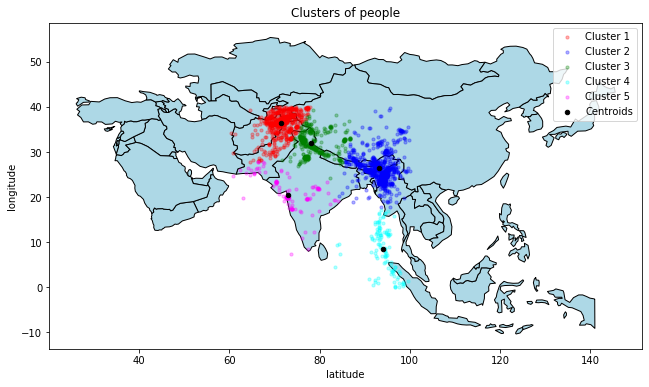

In [ ]:
axis=world_data[world_data.continent=='Asia'].plot(color='lightblue',edgecolor='black')
plt.plot(ax=axis)
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 0], s = 10, c = 'red', label = 'Cluster 1',alpha=0.3)
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 0], s = 10, c = 'blue', label = 'Cluster 2',alpha=0.3)
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 0], s = 10, c = 'green', label = 'Cluster 3',alpha=0.3)
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 0], s = 10, c = 'cyan', label = 'Cluster 4',alpha=0.3)
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 0], s = 10, c = 'magenta', label = 'Cluster 5',alpha=0.3)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters of people')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()
plt.show()

In [ ]:
# importing the libraries for implementing of polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
polynomial_features2= PolynomialFeatures(degree=3)
x_poly2 = polynomial_features2.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly2, y)
y_poly_pred3 = model2.predict(x_poly2)

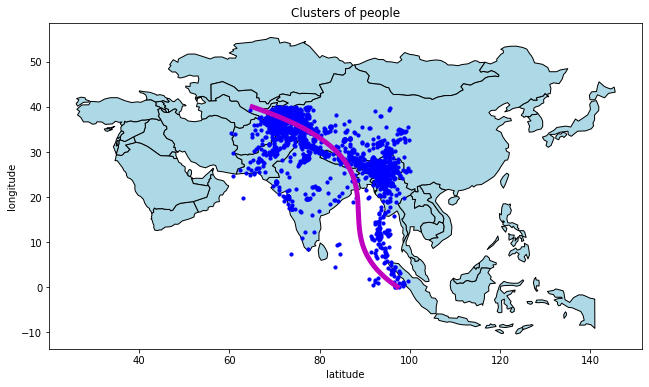

In [ ]:
import operator
axis=world_data[world_data.continent=='Asia'].plot(color='lightblue',edgecolor='black')
plt.plot(ax=axis)
plt.scatter(y, x, s=10,c='blue')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred3), key=sort_axis)
x3, y_poly_pred3 = zip(*sorted_zip)
plt.plot(y_poly_pred3, x3, color='m',linewidth=5.0)
plt.title('Clusters of people')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
X = data.iloc[:, [0,1,2,3]].values
print(X)
target_label=data.iloc[:,5].values
print(target_label)

[[29.06 77.42  5.    2.5 ]
 [19.93 72.92  5.    2.4 ]
 [31.5  74.37 33.    3.4 ]
 ...
 [22.5  88.1  10.    3.6 ]
 [24.6  94.2  54.    3.5 ]
 [14.5  92.9  10.    4.6 ]]
[0 0 3 ... 0 3 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target_label, test_size=0.3, random_state=42)

In [ ]:
dtc = DecisionTreeClassifier(max_depth=5, max_leaf_nodes= 20,random_state=42)
dtc.fit(X_train, y_train) #fitting the model

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, random_state=42)

In [ ]:
y_pred = dtc.predict(X_test) # Predict the test set labels
print(y_pred)

[3 0 0 0 2 3 1 1 2 4 4 0 4 0 0 0 0 0 0 1 0 0 0 0 0 0 1 4 3 1 4 1 4 4 4 0 3
 0 3 1 0 4 1 0 0 0 0 3 0 0 4 0 0 0 0 4 3 1 0 0 0 1 3 3 0 3 0 0 0 0 0 0 0 3
 0 0 0 0 3 4 0 3 1 0 0 1 0 1 0 1 2 0 0 0 0 0 1 0 1 0 0 3 4 0 0 0 2 0 4 2 0
 0 3 4 4 0 4 0 0 0 1 0 0 0 0 0 0 1 0 4 0 0 3 0 0 4 0 0 4 0 1 0 0 0 0 0 0 0
 4 3 0 0 1 4 0 0 1 0 0 0 1 3 0 4 0 0 0 0 1 1 0 0 0 3 0 0 4 0 1 1 0 0 0 1 1
 0 0 0 0 0 3 4 1 0 0 0 4 0 0 1 0 4 0 4 0 3 4 3 3 4 0 0 3 1 0 0 0 0 4 0 2 3
 1 1 0 2 3 3 0 0 1 3 4 2 0 0 0 2 1 0 4 0 0 0 0 0 0 4 3 0 0 0 3 4 3 0 0 0 4
 1 2 3 3 4 2 0 0 2 0 1 0 1 1 0 0 3 0 0 4 1 4 0 4 4 1 3 0 4 0 4 1 0 0 3 1 1
 0 0 1 0 3 0 4 0 1 3 0 0 3 0 0 4 0 0 0 0 0 3 0 0 4 0 1 4 3 4 0 0 1 0 0 0 0
 0 0 3 4 4 3 2 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 3 0 1 0 3 0 1 3 0 0 4 3
 1 0 3 1 3 4 4 0 0 0 0 0 0 1 1 0 0 0 0 0 0 4 2 0 0 0 0 0 0 0 0 0 3 0 0 0 2
 1 0 3 0 0 0 2 3 0 0 0 4 0 0 0 0 0 3 0 3 0 1 0 0 0 0 1 4 3 0 0 0 4 0 0 0 0
 1 0 0 0 0 1 0 0 3 3 0 3 1 4 0 1 0 0 0 0 0 4 3 0 0 0 1 0 0 3 0 0 1 4 0 3 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [ ]:
# Evaluate the test-set accuracy
dtcacc=metrics.accuracy_score(y_test, y_pred)*100
print("test-set accuracy was :",dtcacc)

test-set accuracy was : 99.01960784313727


In [ ]:
## predicting the sample earthquake

In [ ]:
dtc.predict([[9.06,77.42 ,55, 2.5]])

array([3])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = data.iloc[:, [0,1,2,3]].values
print(X)
target_label=data.iloc[:,5].values
print(target_label)

[[29.06 77.42  5.    2.5 ]
 [19.93 72.92  5.    2.4 ]
 [31.5  74.37 33.    3.4 ]
 ...
 [22.5  88.1  10.    3.6 ]
 [24.6  94.2  54.    3.5 ]
 [14.5  92.9  10.    4.6 ]]
[0 0 3 ... 0 3 0]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,target_label,test_size=0.3, random_state=42)

In [ ]:
randomForestClassifer = RandomForestClassifier()
randomForestClassifer.fit(x_train,y_train)

y_pred = randomForestClassifer.predict(x_test)
print(y_pred)

[3 0 0 0 2 3 1 1 2 4 1 0 4 0 0 0 0 0 0 1 0 0 0 0 0 0 1 4 3 1 4 1 1 4 4 0 3
 0 3 1 0 1 1 0 0 0 0 3 0 0 4 0 0 0 0 4 3 1 0 0 0 1 3 3 0 3 0 0 0 0 0 0 0 3
 0 0 0 0 3 4 0 3 1 0 0 1 0 1 0 1 2 0 0 0 0 0 1 0 1 0 0 3 1 0 0 0 2 0 4 2 0
 0 3 4 4 0 1 0 0 0 1 0 0 0 0 0 0 1 0 4 0 0 3 0 0 4 0 0 4 0 1 0 0 0 0 0 0 0
 4 3 0 0 1 3 0 0 1 0 0 0 1 3 0 4 0 0 0 0 1 1 0 0 0 3 0 0 4 0 1 1 0 0 0 1 1
 0 0 0 0 0 3 4 1 0 0 0 4 0 0 1 0 4 0 4 0 3 4 3 3 4 0 0 3 1 0 0 0 0 4 0 2 3
 1 1 0 2 3 3 0 0 1 3 4 2 0 0 0 2 1 0 4 0 0 0 0 0 0 4 3 0 0 0 3 4 3 0 0 0 4
 1 2 3 3 4 2 0 0 2 0 1 0 1 1 0 0 3 0 0 4 1 4 0 4 4 1 3 0 4 0 4 1 0 0 3 1 1
 0 0 1 0 3 0 4 0 1 3 0 0 3 0 0 4 0 0 0 0 0 3 0 0 4 0 1 4 3 4 0 0 1 0 0 0 0
 0 0 3 4 4 3 2 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 3 0 1 0 3 0 1 3 0 0 4 3
 1 0 3 1 3 3 4 0 0 0 0 0 0 1 1 0 0 0 0 0 0 4 2 0 0 0 0 0 0 0 0 0 3 0 0 0 2
 1 0 3 0 0 0 2 3 0 0 0 4 0 0 0 0 0 3 0 3 0 1 0 0 0 0 1 4 3 0 0 0 4 0 0 0 0
 1 0 0 0 0 1 0 0 3 3 0 3 1 4 0 1 0 0 0 0 0 1 3 0 0 0 1 0 0 3 0 0 1 4 0 3 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [ ]:
# Evaluate the test-set accuracy
rfcacc=metrics.accuracy_score(y_test, y_pred)*100
print("test-set accuracy was :",rfcacc)

test-set accuracy was : 100.0


In [ ]:
## predicting the sample earthquake

In [ ]:
randomForestClassifer.predict([[9.06,77.42 ,55, 2.5]])

array([3])

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X = data.iloc[:, [0,1,2,3]].values
print(X)
target_label=data.iloc[:,5].values
print(target_label)

[[29.06 77.42  5.    2.5 ]
 [19.93 72.92  5.    2.4 ]
 [31.5  74.37 33.    3.4 ]
 ...
 [22.5  88.1  10.    3.6 ]
 [24.6  94.2  54.    3.5 ]
 [14.5  92.9  10.    4.6 ]]
[0 0 3 ... 0 3 0]


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, target_label, test_size= 0.3, random_state=42) 

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)
print(y_pred)

[3 0 0 0 2 3 1 1 2 4 1 0 4 0 0 0 0 0 0 1 0 0 0 0 0 0 2 4 3 1 4 1 1 4 4 0 3
 0 3 1 0 1 1 0 0 0 0 3 0 0 4 0 0 0 0 4 3 1 0 0 3 1 3 3 0 3 0 0 0 0 0 0 0 3
 0 0 0 0 3 4 0 3 1 0 0 1 0 2 0 1 2 0 0 0 0 0 1 0 2 0 0 3 1 0 0 3 2 0 4 2 0
 0 3 4 4 3 1 0 0 0 1 0 0 0 0 0 0 1 0 4 0 3 3 0 0 4 0 0 4 0 1 0 0 0 0 0 0 0
 1 3 0 0 1 3 0 0 2 0 0 0 2 3 0 4 0 0 0 0 4 1 0 0 0 3 0 0 4 0 2 1 0 0 0 1 1
 0 0 0 0 0 3 4 1 0 0 0 4 0 0 1 0 4 0 4 0 3 4 3 3 4 3 0 3 1 0 0 0 0 4 0 2 3
 2 1 0 2 3 3 0 0 1 3 4 2 0 0 0 2 1 0 4 0 0 0 0 0 0 4 3 0 0 0 3 4 3 0 0 0 4
 1 2 3 3 4 2 0 0 2 0 1 0 2 1 0 0 3 0 3 4 1 4 0 4 4 1 3 0 4 0 4 1 0 0 3 1 1
 0 0 1 0 3 0 4 0 1 3 0 0 3 0 0 4 0 0 0 0 0 3 0 0 4 0 1 4 3 4 0 0 1 0 0 0 0
 0 0 4 4 4 3 2 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 3 0 3 0 1 0 3 0 1 3 0 0 4 3
 1 0 3 1 3 4 4 0 0 0 0 0 0 1 2 0 0 0 0 0 0 4 2 0 0 0 0 0 0 0 0 0 3 0 0 0 2
 2 0 3 0 0 0 2 3 0 0 0 4 0 0 0 0 0 3 0 3 0 1 0 0 0 0 1 4 3 0 0 0 4 0 0 0 0
 2 0 0 0 0 4 0 0 3 3 0 3 1 4 0 1 0 0 0 0 0 1 3 0 0 0 1 3 0 3 0 0 1 1 0 3 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [ ]:
# Evaluate the test-set accuracy
gnbacc=metrics.accuracy_score(y_test, y_pred)*100
print("test-set accuracy was :",gnbacc)

test-set accuracy was : 95.09803921568627


In [ ]:
## predicting the sample earthquake

In [ ]:
gnb.predict([[9.06,77.42 ,55, 2.5]])

array([3])

### Pattern evoluation

We use visualization technique for to make data understable for user.

In [ ]:
#### For representing graph
from sklearn.tree import plot_tree

for random forest classifer

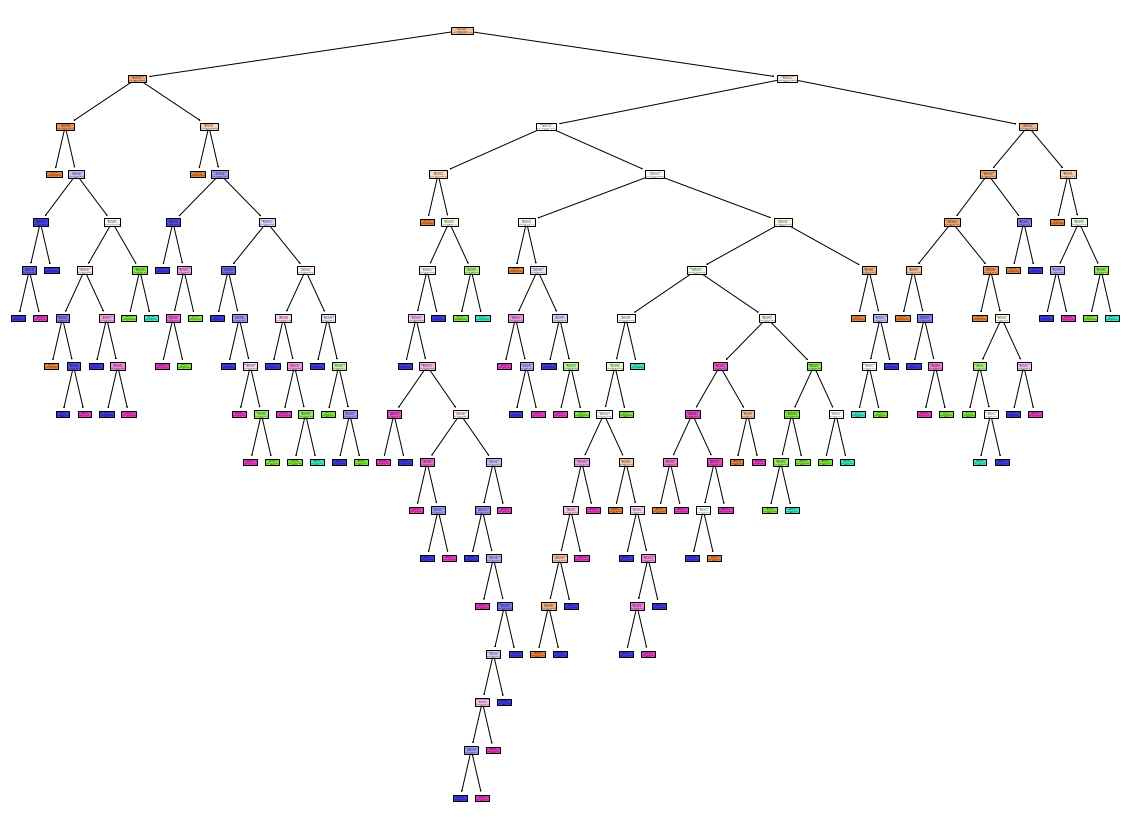

In [ ]:
plt.figure(figsize=(20,15)) #prints the graph
plot_tree(randomForestClassifer.estimators_[0], feature_names = data.columns[0:4],
          class_names=data.columns[5],
          filled = True);
plt.show()

for decision tree

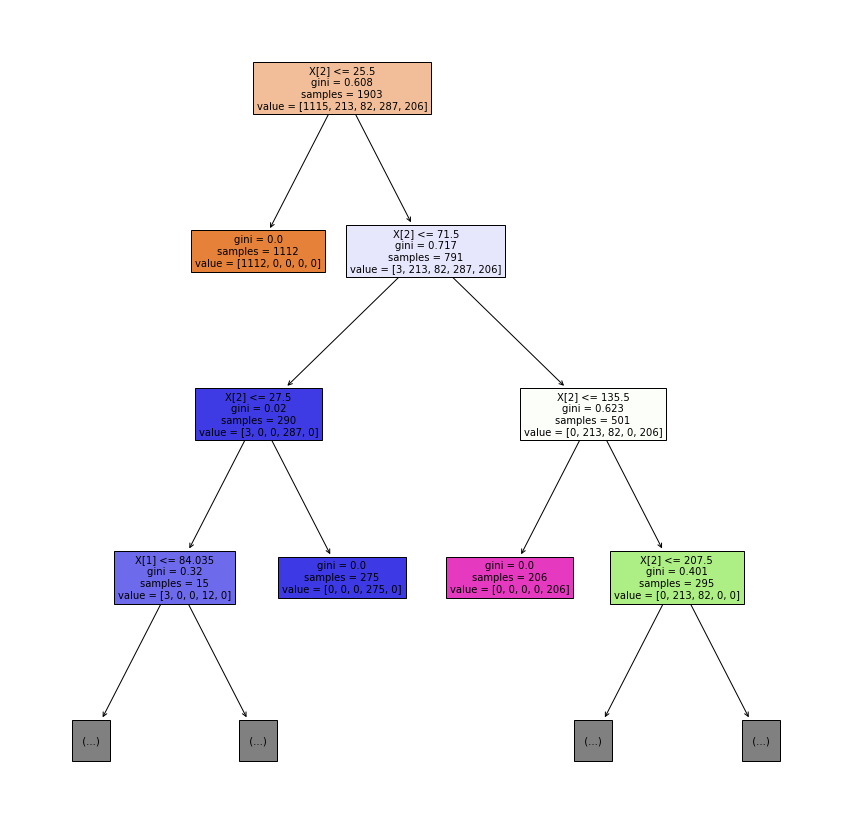

In [ ]:
plt.figure(figsize=(15,15)) #prints the graph
plot_tree(dtc, filled=True, fontsize=10, max_depth=3) # plotting function
plt.show() #shows the graph

### knowledge discovery

This was the final statement, from here we can conclude our analysis and gives a prediction for our subject.

In [ ]:
if(dtcacc>rfcacc and dtcacc>gnbacc):
    print("For this model, Decision tree is Better and it has accuracy equal to ",dtcacc)
elif(rfcacc>dtcacc and rfcacc>gnbacc):
    print("For this model, Random forest tree is Better and it has accuracy equal to ",rfcacc)
else:
    print("For this model, naive bayes is Better and it has accuracy equal to ",gnbacc)

For this model, Random forest tree is Better and it has accuracy equal to  100.0
